In [277]:
!pip install seaborn

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns

In [279]:
train = pd.read_csv('starship_titanic/train.csv')
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [280]:
train['cabin_side'] = train['Cabin'].str[4:]
train['cabin_deck'] = train['Cabin'].str[0:1]
train['cabin_num'] = train['Cabin'].str[2:3]

In [281]:
train["age_group"] = pd.cut(
    train["Age"],
    bins=[0, 18, 26, 35, 50, float("inf")],
    labels=["0-18", "18-26", "26-35", "35-50", "50+"],
    right=False,
)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_side,cabin_deck,cabin_num,age_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B,0,35-50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F,0,18-26
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A,0,50+


14327.0
0.0


<Axes: >

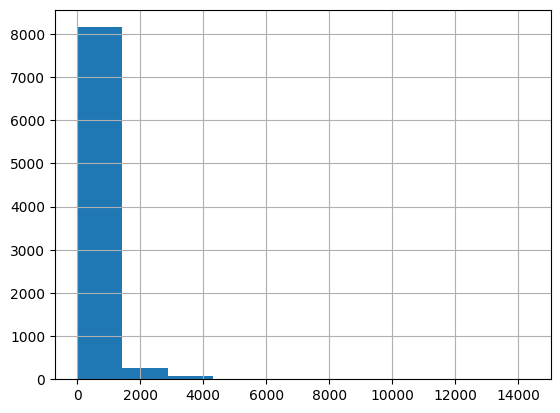

In [282]:
import matplotlib.pyplot as plt

print(train['RoomService'].max())
print(train['RoomService'].min())
train['RoomService'].hist()

/Users/bytedance/miniconda3/envs/kg/lib/python3.10/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


<Axes: xlabel='RoomService', ylabel='Count'>

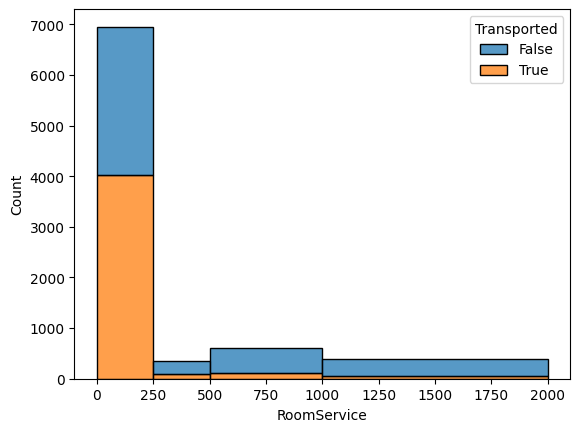

In [283]:
room_bin = [0, 250, 500, 1000, 2000, float('inf')]
room_labels = ['0_250','250_500','500_1000','1000_2000','2000_inf']
sns.histplot(data=train, x='RoomService', hue='Transported',multiple='stack', bins=room_bin)

29813.0
0.0


/Users/bytedance/miniconda3/envs/kg/lib/python3.10/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


<Axes: xlabel='FoodCourt', ylabel='Count'>

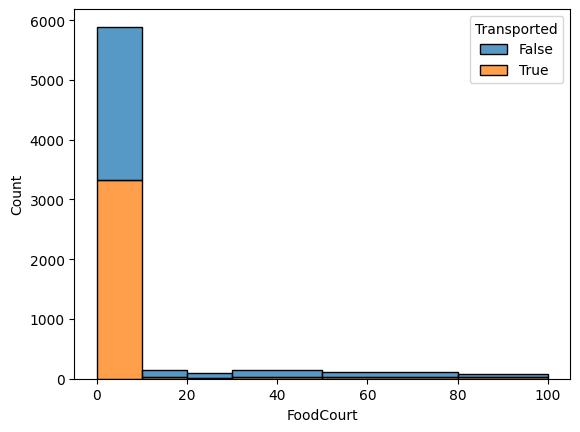

In [284]:
print(train["FoodCourt"].max())
print(train["FoodCourt"].min())
food_bin = [0, 10, 20, 30, 50,80,100, float("inf")]
food_labels = ['0-10','10-20','20-30','30-50','50-80','80-100','100-inf']
sns.histplot(
    data=train, x="FoodCourt", hue="Transported", multiple="stack", bins=food_bin
)

23492.0
0.0


/Users/bytedance/miniconda3/envs/kg/lib/python3.10/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


<Axes: xlabel='ShoppingMall', ylabel='Count'>

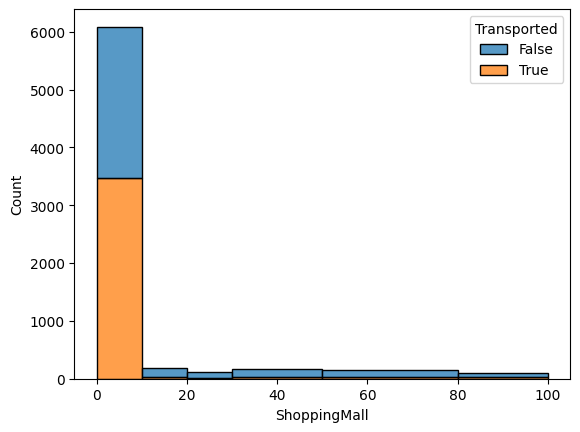

In [285]:
print(train['ShoppingMall'].max())
print(train['ShoppingMall'].min())
shopping_bin = [0,10,20,30,50,80,100, float('inf')]
shopping_labels = ['0-10','10-20','20-30','30-50','50-80','80-100','100-inf']
sns.histplot(data=train, x='ShoppingMall', hue='Transported', multiple='stack', bins=shopping_bin)

22408.0
0.0


/Users/bytedance/miniconda3/envs/kg/lib/python3.10/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


<Axes: xlabel='Spa', ylabel='Count'>

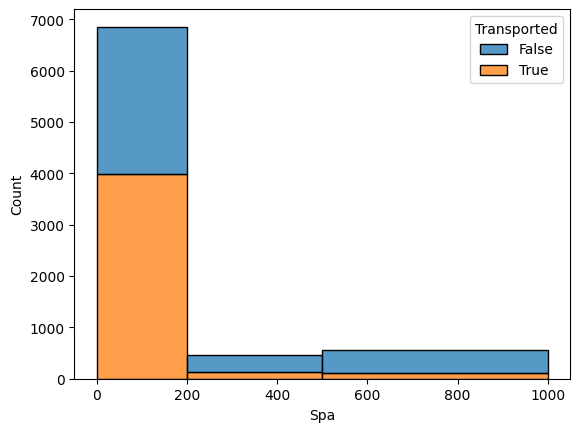

In [286]:
print(train['Spa'].max())
print(train['Spa'].min())
spa_bin = [0,200,500,1000,float('inf')]
spa_labels = ['0-200','200-500','500-1000','1000-inf']
sns.histplot(data=train, x='Spa', hue='Transported', multiple='stack', bins=spa_bin)

24133.0
0.0


/Users/bytedance/miniconda3/envs/kg/lib/python3.10/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


<Axes: xlabel='VRDeck', ylabel='Count'>

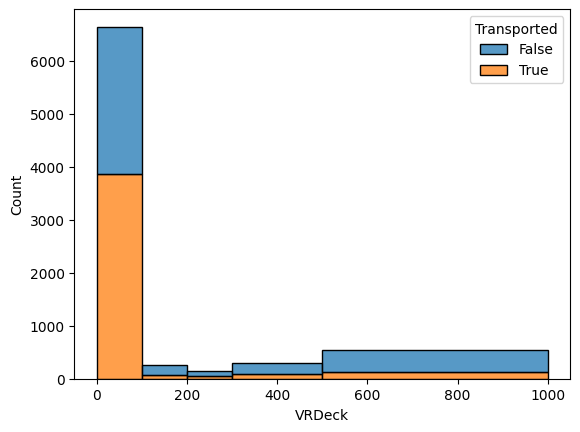

In [287]:
print(train['VRDeck'].max())
print(train['VRDeck'].min())
vrdeck_bin = [0,100,200,300,500,1000,float('inf')]
vrdeck_labels=['0-100','100-200','200-300','300-500','500-1000','1000-inf']
sns.histplot(data=train, x='VRDeck', hue='Transported', multiple='stack', bins=vrdeck_bin)

In [288]:
train['RoomService_Bin'] = pd.cut(train['RoomService'], bins=room_bin, labels=room_labels, right=False)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_side,cabin_deck,cabin_num,age_group,RoomService_Bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B,0,35-50,0_250
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F,0,18-26,0_250
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A,0,50+,0_250


In [289]:
train['FoodCourt_Bin'] = pd.cut(train['FoodCourt'], bins=food_bin,labels=food_labels, right=False)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_side,cabin_deck,cabin_num,age_group,RoomService_Bin,FoodCourt_Bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B,0,35-50,0_250,0-10
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F,0,18-26,0_250,0-10
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A,0,50+,0_250,100-inf


In [290]:
train['ShoppingMall_bin'] = pd.cut(train['ShoppingMall'], bins=shopping_bin, labels=shopping_labels,right=False)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,cabin_side,cabin_deck,cabin_num,age_group,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,P,B,0,35-50,0_250,0-10,0-10
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,S,F,0,18-26,0_250,0-10,20-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,S,A,0,50+,0_250,100-inf,0-10


In [291]:
train['Spa_bin'] = pd.cut(train['Spa'], bins=spa_bin,labels=spa_labels, right=False)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,cabin_side,cabin_deck,cabin_num,age_group,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,P,B,0,35-50,0_250,0-10,0-10,0-200
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,S,F,0,18-26,0_250,0-10,20-30,500-1000
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,S,A,0,50+,0_250,100-inf,0-10,1000-inf


In [292]:
train['VRDeck_bin'] = pd.cut(train['VRDeck'], bins=vrdeck_bin,labels=vrdeck_labels, right=False)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,cabin_side,cabin_deck,cabin_num,age_group,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,P,B,0,35-50,0_250,0-10,0-10,0-200,0-100
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,S,F,0,18-26,0_250,0-10,20-30,500-1000,0-100
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,S,A,0,50+,0_250,100-inf,0-10,1000-inf,0-100


In [293]:
train[['First Name', 'Last Name']] = train['Name'].str.split(' ', expand=True)
train[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,cabin_deck,cabin_num,age_group,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,First Name,Last Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,B,0,35-50,0_250,0-10,0-10,0-200,0-100,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,F,0,18-26,0_250,0-10,20-30,500-1000,0-100,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,A,0,50+,0_250,100-inf,0-10,1000-inf,0-100,Altark,Susent


In [294]:
train = train[['Transported','PassengerId', 'HomePlanet','CryoSleep','Destination','age_group','cabin_deck','cabin_num','cabin_side','First Name','Last Name','RoomService_Bin','FoodCourt_Bin','ShoppingMall_bin','Spa_bin','VRDeck_bin']]
train[:3]

,Transported,PassengerId,HomePlanet,CryoSleep,Destination,age_group,cabin_deck,cabin_num,cabin_side,First Name,Last Name,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin
0,False,0001_01,Europa,False,TRAPPIST-1e,35-50,B,0,P,Maham,Ofracculy,0_250,0-10,0-10,0-200,0-100
1,True,0002_01,Earth,False,TRAPPIST-1e,18-26,F,0,S,Juanna,Vines,0_250,0-10,20-30,500-1000,0-100
2,False,0003_01,Europa,False,TRAPPIST-1e,50+,A,0,S,Altark,Susent,0_250,100-inf,0-10,1000-inf,0-100


In [295]:
temp = train.groupby('First Name')['Transported'].apply(lambda x:x.sum()).reset_index(name='first count').sort_values('first count', ascending=False)

temp['first_ratio'] = temp['first count']/len(temp)
temp

,First Name,first count,first_ratio
383,Betenar,7,0.002587
1745,Minoton,7,0.002587
817,Dyonon,7,0.002587
1393,Jonaye,7,0.002587
1568,Loree,7,0.002587
...,...,...,...
2121,Rosts,0,0.000000
2126,Rowl,0,0.000000
859,Eleon,0,0.000000
858,Elenna,0,0.000000


In [296]:
train = pd.merge(train, temp, on="First Name", how="left")
train

,Transported,PassengerId,HomePlanet,CryoSleep,Destination,age_group,cabin_deck,cabin_num,cabin_side,First Name,Last Name,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,first count,first_ratio
0,False,0001_01,Europa,False,TRAPPIST-1e,35-50,B,0,P,Maham,Ofracculy,0_250,0-10,0-10,0-200,0-100,1.0,0.000370
1,True,0002_01,Earth,False,TRAPPIST-1e,18-26,F,0,S,Juanna,Vines,0_250,0-10,20-30,500-1000,0-100,4.0,0.001478
2,False,0003_01,Europa,False,TRAPPIST-1e,50+,A,0,S,Altark,Susent,0_250,100-inf,0-10,1000-inf,0-100,0.0,0.000000
3,False,0003_02,Europa,False,TRAPPIST-1e,26-35,A,0,S,Solam,Susent,0_250,100-inf,100-inf,1000-inf,100-200,2.0,0.000739
4,True,0004_01,Earth,False,TRAPPIST-1e,0-18,F,1,S,Willy,Santantines,250_500,50-80,100-inf,500-1000,0-100,6.0,0.002217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,9276_01,Europa,False,55 Cancri e,35-50,A,9,/P,Gravior,Noxnuther,0_250,100-inf,0-10,1000-inf,0-100,0.0,0.000000
8689,False,9278_01,Earth,True,PSO J318.5-22,18-26,G,1,99/S,Kurta,Mondalley,0_250,0-10,0-10,0-200,0-100,0.0,0.000000
8690,True,9279_01,Earth,False,TRAPPIST-1e,26-35,G,1,00/S,Fayey,Connon,0_250,0-10,100-inf,0-200,0-100,2.0,0.000739
8691,False,9280_01,Europa,False,55 Cancri e,26-35,E,6,8/S,Celeon,Hontichre,0_250,100-inf,0-10,200-500,1000-inf,2.0,0.000739


In [297]:
temp = train.groupby('Last Name')['Transported'].apply(lambda x:x.sum()).reset_index(name='Last Count').sort_values('Last Count', ascending=False)

temp['last_ratio'] = temp['Last Count']/len(temp)
temp

,Last Name,Last Count,last_ratio
604,Domington,14,0.006315
113,Barbes,10,0.004511
260,Browlerson,9,0.004060
1275,Mckinsond,9,0.004060
1353,Moodsey,9,0.004060
...,...,...,...
1895,Spanxibus,0,0.000000
565,Depie,0,0.000000
1582,Port,0,0.000000
1090,Jeffey,0,0.000000


In [298]:
train = pd.merge(train, temp, on='Last Name', how='left')
train

,Transported,PassengerId,HomePlanet,CryoSleep,Destination,age_group,cabin_deck,cabin_num,cabin_side,First Name,Last Name,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,first count,first_ratio,Last Count,last_ratio
0,False,0001_01,Europa,False,TRAPPIST-1e,35-50,B,0,P,Maham,Ofracculy,0_250,0-10,0-10,0-200,0-100,1.0,0.000370,0.0,0.000000
1,True,0002_01,Earth,False,TRAPPIST-1e,18-26,F,0,S,Juanna,Vines,0_250,0-10,20-30,500-1000,0-100,4.0,0.001478,4.0,0.001804
2,False,0003_01,Europa,False,TRAPPIST-1e,50+,A,0,S,Altark,Susent,0_250,100-inf,0-10,1000-inf,0-100,0.0,0.000000,3.0,0.001353
3,False,0003_02,Europa,False,TRAPPIST-1e,26-35,A,0,S,Solam,Susent,0_250,100-inf,100-inf,1000-inf,100-200,2.0,0.000739,3.0,0.001353
4,True,0004_01,Earth,False,TRAPPIST-1e,0-18,F,1,S,Willy,Santantines,250_500,50-80,100-inf,500-1000,0-100,6.0,0.002217,3.0,0.001353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,9276_01,Europa,False,55 Cancri e,35-50,A,9,/P,Gravior,Noxnuther,0_250,100-inf,0-10,1000-inf,0-100,0.0,0.000000,1.0,0.000451
8689,False,9278_01,Earth,True,PSO J318.5-22,18-26,G,1,99/S,Kurta,Mondalley,0_250,0-10,0-10,0-200,0-100,0.0,0.000000,0.0,0.000000
8690,True,9279_01,Earth,False,TRAPPIST-1e,26-35,G,1,00/S,Fayey,Connon,0_250,0-10,100-inf,0-200,0-100,2.0,0.000739,6.0,0.002706
8691,False,9280_01,Europa,False,55 Cancri e,26-35,E,6,8/S,Celeon,Hontichre,0_250,100-inf,0-10,200-500,1000-inf,2.0,0.000739,1.0,0.000451


In [299]:
temp = train.groupby('Destination')['Transported'].apply(lambda x:x.sum()).reset_index(name='Dest Count').sort_values('Dest Count', ascending=False)

temp['Dest_Ratio']=temp['Dest Count']/temp['Dest Count'].sum()
temp[:3]

,Destination,Dest Count,Dest_Ratio
2,TRAPPIST-1e,2787,0.650257
0,55 Cancri e,1098,0.256183
1,PSO J318.5-22,401,0.093560


In [300]:
train = pd.merge(train, temp, on='Destination', how='left')
train[:3]

,Transported,PassengerId,HomePlanet,CryoSleep,Destination,age_group,cabin_deck,cabin_num,cabin_side,First Name,...,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,first count,first_ratio,Last Count,last_ratio,Dest Count,Dest_Ratio
0,False,0001_01,Europa,False,TRAPPIST-1e,35-50,B,0,P,Maham,...,0-10,0-10,0-200,0-100,1.0,0.000370,0.0,0.000000,2787.0,0.650257
1,True,0002_01,Earth,False,TRAPPIST-1e,18-26,F,0,S,Juanna,...,0-10,20-30,500-1000,0-100,4.0,0.001478,4.0,0.001804,2787.0,0.650257
2,False,0003_01,Europa,False,TRAPPIST-1e,50+,A,0,S,Altark,...,100-inf,0-10,1000-inf,0-100,0.0,0.000000,3.0,0.001353,2787.0,0.650257


In [301]:
train = train.drop(columns=['first count', 'Last Count', 'Dest Count'])
train

,Transported,PassengerId,HomePlanet,CryoSleep,Destination,age_group,cabin_deck,cabin_num,cabin_side,First Name,Last Name,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,first_ratio,last_ratio,Dest_Ratio
0,False,0001_01,Europa,False,TRAPPIST-1e,35-50,B,0,P,Maham,Ofracculy,0_250,0-10,0-10,0-200,0-100,0.000370,0.000000,0.650257
1,True,0002_01,Earth,False,TRAPPIST-1e,18-26,F,0,S,Juanna,Vines,0_250,0-10,20-30,500-1000,0-100,0.001478,0.001804,0.650257
2,False,0003_01,Europa,False,TRAPPIST-1e,50+,A,0,S,Altark,Susent,0_250,100-inf,0-10,1000-inf,0-100,0.000000,0.001353,0.650257
3,False,0003_02,Europa,False,TRAPPIST-1e,26-35,A,0,S,Solam,Susent,0_250,100-inf,100-inf,1000-inf,100-200,0.000739,0.001353,0.650257
4,True,0004_01,Earth,False,TRAPPIST-1e,0-18,F,1,S,Willy,Santantines,250_500,50-80,100-inf,500-1000,0-100,0.002217,0.001353,0.650257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,9276_01,Europa,False,55 Cancri e,35-50,A,9,/P,Gravior,Noxnuther,0_250,100-inf,0-10,1000-inf,0-100,0.000000,0.000451,0.256183
8689,False,9278_01,Earth,True,PSO J318.5-22,18-26,G,1,99/S,Kurta,Mondalley,0_250,0-10,0-10,0-200,0-100,0.000000,0.000000,0.093560
8690,True,9279_01,Earth,False,TRAPPIST-1e,26-35,G,1,00/S,Fayey,Connon,0_250,0-10,100-inf,0-200,0-100,0.000739,0.002706,0.650257
8691,False,9280_01,Europa,False,55 Cancri e,26-35,E,6,8/S,Celeon,Hontichre,0_250,100-inf,0-10,200-500,1000-inf,0.000739,0.000451,0.256183


In [302]:
train = train.drop(columns=['First Name', 'Last Name'])
train

,Transported,PassengerId,HomePlanet,CryoSleep,Destination,age_group,cabin_deck,cabin_num,cabin_side,RoomService_Bin,FoodCourt_Bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,first_ratio,last_ratio,Dest_Ratio
0,False,0001_01,Europa,False,TRAPPIST-1e,35-50,B,0,P,0_250,0-10,0-10,0-200,0-100,0.000370,0.000000,0.650257
1,True,0002_01,Earth,False,TRAPPIST-1e,18-26,F,0,S,0_250,0-10,20-30,500-1000,0-100,0.001478,0.001804,0.650257
2,False,0003_01,Europa,False,TRAPPIST-1e,50+,A,0,S,0_250,100-inf,0-10,1000-inf,0-100,0.000000,0.001353,0.650257
3,False,0003_02,Europa,False,TRAPPIST-1e,26-35,A,0,S,0_250,100-inf,100-inf,1000-inf,100-200,0.000739,0.001353,0.650257
4,True,0004_01,Earth,False,TRAPPIST-1e,0-18,F,1,S,250_500,50-80,100-inf,500-1000,0-100,0.002217,0.001353,0.650257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,9276_01,Europa,False,55 Cancri e,35-50,A,9,/P,0_250,100-inf,0-10,1000-inf,0-100,0.000000,0.000451,0.256183
8689,False,9278_01,Earth,True,PSO J318.5-22,18-26,G,1,99/S,0_250,0-10,0-10,0-200,0-100,0.000000,0.000000,0.093560
8690,True,9279_01,Earth,False,TRAPPIST-1e,26-35,G,1,00/S,0_250,0-10,100-inf,0-200,0-100,0.000739,0.002706,0.650257
8691,False,9280_01,Europa,False,55 Cancri e,26-35,E,6,8/S,0_250,100-inf,0-10,200-500,1000-inf,0.000739,0.000451,0.256183


In [303]:
train = pd.get_dummies(train, columns=['CryoSleep','HomePlanet', 'Destination', 'age_group', 'cabin_deck', 'cabin_num','cabin_side','RoomService_Bin','FoodCourt_Bin','ShoppingMall_bin','Spa_bin','VRDeck_bin'])
train[:3]

,Transported,PassengerId,first_ratio,last_ratio,Dest_Ratio,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
0,False,0001_01,0.000370,0.000000,0.650257,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
1,True,0002_01,0.001478,0.001804,0.650257,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2,False,0003_01,0.000000,0.001353,0.650257,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False


In [304]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
train[:3]


,Transported,PassengerId,first_ratio,last_ratio,Dest_Ratio,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
0,False,0001_01,0.000370,0.000000,0.650257,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
1,True,0002_01,0.001478,0.001804,0.650257,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2,False,0003_01,0.000000,0.001353,0.650257,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False


# use xgboost

In [337]:
def preprocess(train: pd.DataFrame):
    # process cabin
    train["cabin_side"] = train["Cabin"].str[4:]
    train["cabin_deck"] = train["Cabin"].str[0:1]
    train["cabin_num"] = train["Cabin"].str[2:3]
    # process age
    train["age_group"] = pd.cut(
        train["Age"],
        bins=[0, 18, 26, 35, 50, float("inf")],
        labels=["0-18", "18-26", "26-35", "35-50", "50+"],
        right=False,
    )
    # process room bin
    room_bin = [0, 250, 500, 1000, 2000, float('inf')]
    room_labels = ['0_250','250_500','500_1000','1000_2000','2000_inf']
    train['RoomService_Bin'] = pd.cut(train['RoomService'], bins=room_bin, labels=room_labels, right=False)
    # process food bin
    food_bin = [0, 10, 20, 30, 50,80,100, float("inf")]
    food_labels = ['0-10','10-20','20-30','30-50','50-80','80-100','100-inf']
    train['FoodCourt_Bin'] = pd.cut(train['FoodCourt'], bins=food_bin,labels=food_labels, right=False)
    # process shopping bin
    shopping_bin = [0,10,20,30,50,80,100, float('inf')]
    shopping_labels = ['0-10','10-20','20-30','30-50','50-80','80-100','100-inf']
    train['ShoppingMall_bin'] = pd.cut(train['ShoppingMall'], bins=shopping_bin, labels=shopping_labels,right=False)
    # process spa bin
    spa_bin = [0,200,500,1000,float('inf')]
    spa_labels = ['0-200','200-500','500-1000','1000-inf']
    train['Spa_bin'] = pd.cut(train['Spa'], bins=spa_bin,labels=spa_labels, right=False)
    # process vrdeck bin
    vrdeck_bin = [0,100,200,300,500,1000,float('inf')]
    vrdeck_labels=['0-100','100-200','200-300','300-500','500-1000','1000-inf']
    train['VRDeck_bin'] = pd.cut(train['VRDeck'], bins=vrdeck_bin,labels=vrdeck_labels, right=False)

    # process name
    train[['First Name', 'Last Name']] = train['Name'].str.split(' ', expand=True)
    if 'Transported' in train.columns:
        train = train[['Transported','PassengerId', 'HomePlanet','CryoSleep','Destination','age_group','cabin_deck','cabin_num','cabin_side','First Name','Last Name','RoomService_Bin','FoodCourt_Bin','ShoppingMall_bin','Spa_bin','VRDeck_bin']]
    else:
        train = train[['PassengerId', 'HomePlanet','CryoSleep','Destination','age_group','cabin_deck','cabin_num','cabin_side','First Name','Last Name','RoomService_Bin','FoodCourt_Bin','ShoppingMall_bin','Spa_bin','VRDeck_bin']]

    # process first name ratio
    # temp = train.groupby('First Name')['Transported'].apply(lambda x:x.sum()).reset_index(name='first count').sort_values('first count', ascending=False)
    # temp['first_ratio'] = temp['first count']/len(temp)
    # train = pd.merge(train, temp, on="First Name", how="left")

    # # process last name ratio
    # temp = train.groupby('Last Name')['Transported'].apply(lambda x:x.sum()).reset_index(name='Last Count').sort_values('Last Count', ascending=False)
    # temp['last_ratio'] = temp['Last Count']/len(temp)
    # train = pd.merge(train, temp, on='Last Name', how='left')

    # # process dest ratio
    # temp = train.groupby('Destination')['Transported'].apply(lambda x:x.sum()).reset_index(name='Dest Count').sort_values('Dest Count', ascending=False)
    # temp['Dest_Ratio']=temp['Dest Count']/temp['Dest Count'].sum()
    # train = pd.merge(train, temp, on='Destination', how='left')

    # drop use less column
    train = train.drop(columns=['First Name', 'Last Name'])
    train = pd.get_dummies(train, columns=['CryoSleep','HomePlanet', 'Destination', 'age_group', 'cabin_deck', 'cabin_num','cabin_side','RoomService_Bin','FoodCourt_Bin','ShoppingMall_bin','Spa_bin','VRDeck_bin'])
    return train



In [338]:
train1 = pd.read_csv('starship_titanic/train.csv')
train1 = preprocess(train1)
train1[:3]

,Transported,PassengerId,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
0,False,0001_01,True,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
1,True,0002_01,True,False,True,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,0003_01,True,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False


In [340]:
X, y = train1.drop(columns=['Transported','PassengerId']),train['Transported']
X_train,X_val,y_train,y_val = train_test_split(X, y , test_size=0.2, random_state=42)
X_val[:3]

,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,age_group_0-18,age_group_18-26,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
304,True,False,False,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
2697,True,False,True,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,False,False,False
8424,False,True,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


In [341]:
train_data = xgb.DMatrix(X_train, label=y_train)
val_data = xgb.DMatrix(X_val, label=y_val)
X_train[:3]

,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,age_group_0-18,age_group_18-26,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
2333,True,False,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2589,True,False,True,False,False,False,False,True,True,False,...,True,False,False,False,True,False,False,False,False,False
8302,False,True,False,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [358]:
from sklearn.metrics import roc_auc_score

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

bst = xgb.train(params=params, dtrain=train_data, num_boost_round=100)

y_pred = bst.predict(val_data)
train_loss = roc_auc_score(y_val, y_pred)
print(f'auc={train_loss}')

auc=0.8710457459276839


In [359]:
test = pd.read_csv('starship_titanic/test.csv')
test1 = preprocess(test)
test1[:3]

,PassengerId,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,age_group_0-18,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
0,0013_01,False,True,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
1,0018_01,True,False,True,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
2,0019_01,False,True,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [360]:
dtest = xgb.DMatrix(test1.drop(columns=['PassengerId']))
y_test = bst.predict(dtest)
result = pd.DataFrame({'PassengerId':test1['PassengerId'],'Transported':y_test>0.5})
result.to_csv('spaceship_submission.csv', index=False)
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# use pytorch


In [363]:
!pip install torch

In [366]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [383]:
t = torch.randn(3,2)
print(t)
sm = nn.Softmax(dim=1)
print(sm(t))
result = torch.argmax(sm(t),dim=1)
print(result)
result ==1

tensor([[-1.1519, -0.0331],
        [-0.0587,  1.1672],
        [-1.0325, -1.2785]])
tensor([[0.2462, 0.7538],
        [0.2269, 0.7731],
        [0.5612, 0.4388]])
tensor([1, 1, 0])


tensor([ True,  True, False])

In [401]:
class ShipModule(nn.Module):
    def __init__(self, n_in) -> None:
        super(ShipModule, self).__init__()
        self.lc1 = nn.Linear(n_in, 64)
        self.lc2 = nn.Linear(64, 32)
        self.lc3 = nn.Linear(32, 8)
        self.lc4 = nn.Linear(8, 2)

    def forward(self, x):
        x = F.relu(self.lc1(x))
        x = F.relu(self.lc2(x))
        x = F.relu(self.lc3(x))
        x = F.relu(self.lc4(x))
        return F.softmax(x)

In [402]:
train = pd.read_csv('starship_titanic/train.csv')
train = preprocess(train)
X_train,y_train = train.drop(columns=['Transported','PassengerId']), train['Transported']
X_train[:3]

,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,age_group_0-18,age_group_18-26,...,Spa_bin_0-200,Spa_bin_200-500,Spa_bin_500-1000,Spa_bin_1000-inf,VRDeck_bin_0-100,VRDeck_bin_100-200,VRDeck_bin_200-300,VRDeck_bin_300-500,VRDeck_bin_500-1000,VRDeck_bin_1000-inf
0,True,False,False,True,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
1,True,False,True,False,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False
2,True,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [442]:
import torch.utils
import torch.utils.data


X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)
X_tensor.shape, y_tensor.shape

(torch.Size([8693, 284]), torch.Size([8693]))

In [443]:
y_tensor

tensor([0, 1, 0,  ..., 1, 0, 1])

In [444]:
ds = torch.utils.data.TensorDataset(X_tensor, y_tensor)
dataloader = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)

In [447]:
max_epoch = 100
model = ShipModule(284)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_items = []
for i in range(max_epoch):
    model.train()
    for X, y in dataloader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = F.cross_entropy(y_pred, y)
        loss.backward()
        optimizer.step()
        loss_items.append(loss.item())
    if i % 5 == 0:
        print(f"Epoch [{i}/{max_epoch}], Loss: {np.array(loss_items).mean():.4f}")

/var/folders/3g/tl85hk5x7y5b5tvmksz06nj40000gn/T/ipykernel_5658/1237603172.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Epoch [0/100], Loss: 0.6317
Epoch [5/100], Loss: 0.6045
Epoch [10/100], Loss: 0.5991
Epoch [15/100], Loss: 0.5958
Epoch [20/100], Loss: 0.5931
Epoch [25/100], Loss: 0.5910
Epoch [30/100], Loss: 0.5890
Epoch [35/100], Loss: 0.5874
Epoch [40/100], Loss: 0.5860
Epoch [45/100], Loss: 0.5849
Epoch [50/100], Loss: 0.5838
Epoch [55/100], Loss: 0.5829
Epoch [60/100], Loss: 0.5820
Epoch [65/100], Loss: 0.5813
Epoch [70/100], Loss: 0.5806
Epoch [75/100], Loss: 0.5799
Epoch [80/100], Loss: 0.5794
Epoch [85/100], Loss: 0.5788
Epoch [90/100], Loss: 0.5783
Epoch [95/100], Loss: 0.5778


In [446]:
loss.item()

0.40852105617523193